Using this Kaggle data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

C:\Users\maken\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
original = pd.read_csv('D:\\Data\\melbourne-housing-market\\Melbourne_housing_extra_data-18-08-2017.csv')
#original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\GitHub\\Thinkful_Unit_3\\Melbourne\\Melbourne_housing_FULL-26-09-2017.csv')

In [3]:
data = original

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
19737,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,...,2.0,2.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0
19738,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,1.0,2.0,269.0,NaN,NaN,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0
19739,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,3.0,2.0,1087.0,388.5,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0
19740,Yarraville,10/127 Somerville Rd,3,t,645000.0,SP,Jas,29/07/2017,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0


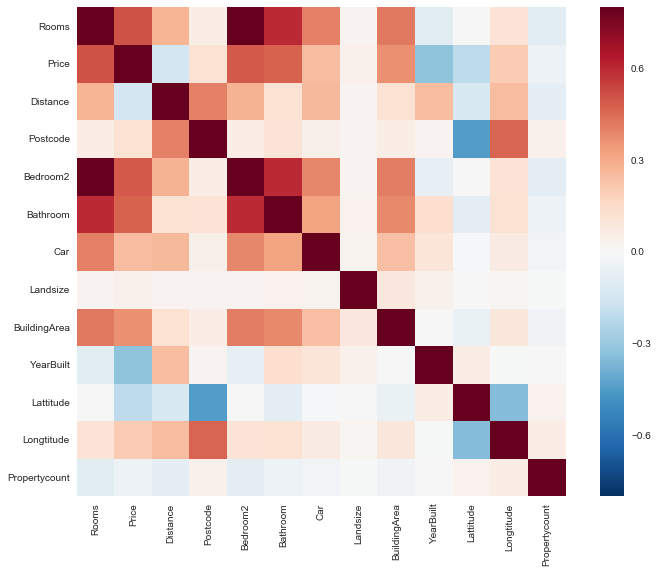

In [6]:
# Create a heatmap to compare the correlation of the columns.

corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Cleaning the data

In [7]:
# Since there are a lot of columns around the area (address, zip, etc.), 
# find out which ones have the least amount of missing data.
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4055
Bathroom          4055
Car               4055
Landsize          4082
BuildingArea     11359
YearBuilt        10092
CouncilArea       4085
Lattitude         3937
Longtitude        3937
Regionname           1
Propertycount        1
dtype: int64

In [8]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
#data.drop(['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'], axis=1)
drop_columns = data[['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname']]
#print(drop_columns)
data.drop(drop_columns, axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Converting Suburb into values based on categories
data['Suburb'] = data['Suburb'].astype('category')
data['Suburb'] = data['Suburb'].cat.codes
#data.head()
data['Suburb'].nunique()

330

In [10]:
# Converting dates to datetime64
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
################# Is this necessary?
# Converting YearBuilt to datetime64
#data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format = '%Y')
#data['YearBuilt'] = data['YearBuilt'].dt.year

In [12]:
# Converting each housing type into a binary value
data['house'] = False
data.loc[data['Type'] == 'h', 'house'] = True
data['unit'] = False
data.loc[data['Type'] == 'u', 'unit'] = True

In [13]:
new_data = data[['Suburb', 'house', 'unit', 'Rooms', 'Price', 'Date', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
new_data

,Suburb,house,unit,Rooms,Price,Date,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,False,False,2,NaN,2016-03-09,1.0,1.0,126.0,NaN,NaN
1,0,True,False,2,1480000.0,2016-03-12,1.0,1.0,202.0,NaN,NaN
2,0,True,False,2,1035000.0,2016-04-02,1.0,0.0,156.0,79.00,1900.0
3,0,False,True,3,NaN,2016-04-02,2.0,1.0,0.0,NaN,NaN
4,0,True,False,3,1465000.0,2017-04-03,2.0,0.0,134.0,150.00,1900.0
5,0,True,False,3,850000.0,2017-04-03,2.0,1.0,94.0,NaN,NaN
6,0,True,False,4,1600000.0,2016-04-06,1.0,2.0,120.0,142.00,2014.0
7,0,True,False,4,NaN,2016-06-08,2.0,2.0,400.0,220.00,2006.0
8,0,True,False,2,NaN,2016-06-08,1.0,2.0,201.0,NaN,1900.0
9,0,True,False,2,NaN,2016-06-08,2.0,1.0,202.0,NaN,1900.0


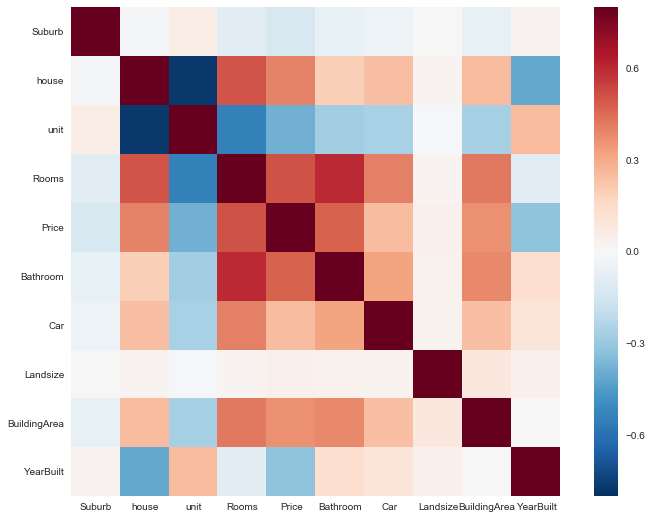

In [14]:
# Create a heatmap to compare the correlation of the columns.

corrmat = new_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Filling Missing Values
### Create a function that populates missing values by comparing them to values contained in a row of similar components. For example, a two bedroom, two bathroom townhouse with a missing price should have its price populated with the average price of other two bedroom, two bathroom townhouses. 

# Creating the Model and Determining the Best Explanatory Features
### Gradient Boosting will allow for the determination of the best explanatory features

In [15]:
X = new_data.drop('Price', 1)
Y = new_data['Price']

In [16]:
# 500 iterations, using 5-deep trees, and loss function 'deviance.'
# Play around with number of iterations
# Look into learning rate
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X,Y)
y_pred = clf.fit(X,Y).predict(X)

# Print the R-Squared value and store it in the table
print('R-Squared of the model:') 
score = r2_score(Y, y_pred)
print(score)

# Print the accuracy of the model and store it in the table
print('Accuracy of the model:')
print(clf.score(X,Y))
# TODO: STORE IN TABLE


print('Confusion Matrix of the model:')
conf_mat = confusion_matrix(Y, y_pred)
print(conf_mat)

# Print the AUROC.
cv = cross_val_score(clf, X, Y, cv=10, scoring='roc_auc') 
print('AUROC Score:')
print(cv)
# Print the average of the AUROC and store it in the table
print('Average of the AUROC Score:')
print(sum(cv)/len(cv))

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()